<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/linear_regression_bikesDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Bikes Dataset — Beginner's Colab Notebook
**Author:** Generated for Pavithran Ayyala


**What you'll learn:**

- Load and explore a dataset using Pandas
- Check and clean data quality issues (missing values, duplicates, outliers)
- Build, train, and evaluate a Linear Regression model using scikit-learn
- Visualize results and interpret model coefficients

---

> **Notes for Colab users:**
> - If `bikes.csv` is not present, upload it via `Files > Upload` in Colab or mount your Google Drive and place the file there.
> - Run cells in order. Cells include explanatory comments and suggested exercises for students.

_Last updated: 2025-10-12 09:56:39_


## Setup
This cell installs any missing packages (if needed) and shows how to mount Google Drive in Colab.
Run it if you're on Colab and uncertain about packages or file locations.

In [ ]:
# Uncomment and run the following lines if running on Google Colab and packages are missing.
# !pip install -U scikit-learn pandas matplotlib

# If your dataset is in Google Drive, uncomment to mount:
# from google.colab import drive
# drive.mount('/content/drive')
# Then update the path to your CSV, e.g. '/content/drive/MyDrive/path/to/bikes.csv'
print("Setup cell — install packages only if required and mount Drive if using Colab.")

Setup cell — install packages only if required and mount Drive if using Colab.


# **About Dataset**

Real-world bike rental data based on weather

The Bike Rentals dataset is a popular real-world dataset (used by Kaggle, UCI ML Repository, and academic labs).

Each record (row) represents a single time period — typically a day or an hour —
and shows how many bikes were rented, along with weather and environmental conditions on that day.

GOAL - We want to predict the number of bikes rented (rentals)
based on conditions like temperature, humidity, windspeed, etc.


Feature	Typical Relationship with Rentals	Explanation

-- > Temperature	⬆️ Increases rentals	Warm weather encourages biking
-- > Humidity	⬇️ Decreases rentals	Humid/sticky days discourage biking
-- > Windspeed	⬇️ Decreases rentals	Strong winds make biking harder


| date       | temperature | humidity | windspeed | rentals |
| ---------- | ----------- | -------- | --------- | ------- |
| 2024-01-01 | 12.0        | 80       | 10        | 120     |
| 2024-01-02 | 18.0        | 65       | 7         | 220     |
| 2024-01-03 | 25.0        | 55       | 5         | 400     |
| 2024-01-04 | 32.0        | 40       | 15        | 500     |
| 2024-01-05 | 28.0        | 50       | 12        | 450     |



## 1) Load the dataset
This cell loads `bikes.csv` into a pandas DataFrame named `bikes`.
Make sure `bikes.csv` is in the current working directory, or provide a full path to the file.


In [3]:
import pandas as pd

# Load the dataset. If the file isn't in the runtime, upload it (Colab -> Files -> Upload)
# or provide the full path (e.g., '/content/drive/MyDrive/bikes.csv') if mounted from Google Drive.

from google.colab import files
uploaded = files.upload()


bikes = pd.read_csv('bikes.csv')

# Quick sanity-check: show top 5 rows
print("First 5 rows of the dataset:")
display(bikes.head())

# Basic info about dataset: shape, dtypes, non-null counts
print('\nDataFrame info:')
bikes.info()

# Basic descriptive statistics
print('\nDescriptive statistics:')
display(bikes.describe(include='all'))


Saving bikes.csv to bikes.csv
First 5 rows of the dataset:


,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB

Descriptive statistics:


,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


## 2) Exploratory Data Analysis (EDA)
Let's visualize key relationships and distributions. These plots help spot trends and potential data issues.

Exploratory Data Analysis (EDA) is the first step in understanding your dataset.
It helps you see what’s inside, identify patterns, relationships, and potential data quality issues before modeling.

['temperature', 'humidity', 'windspeed']


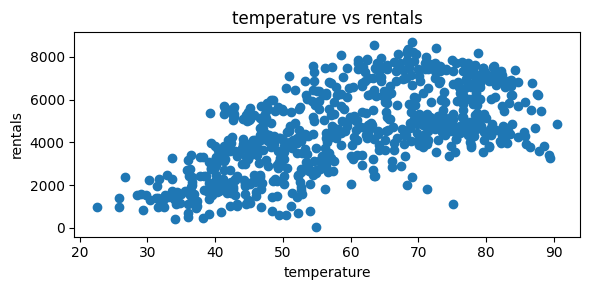

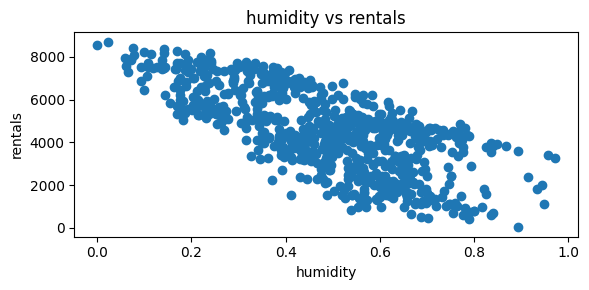

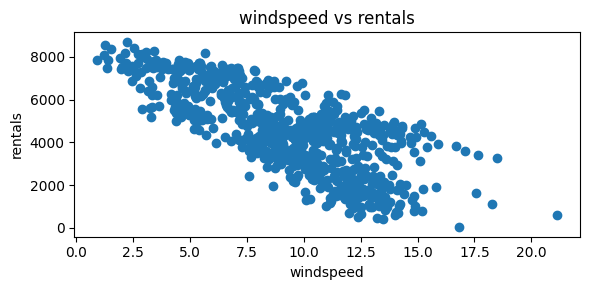


Feature distributions:


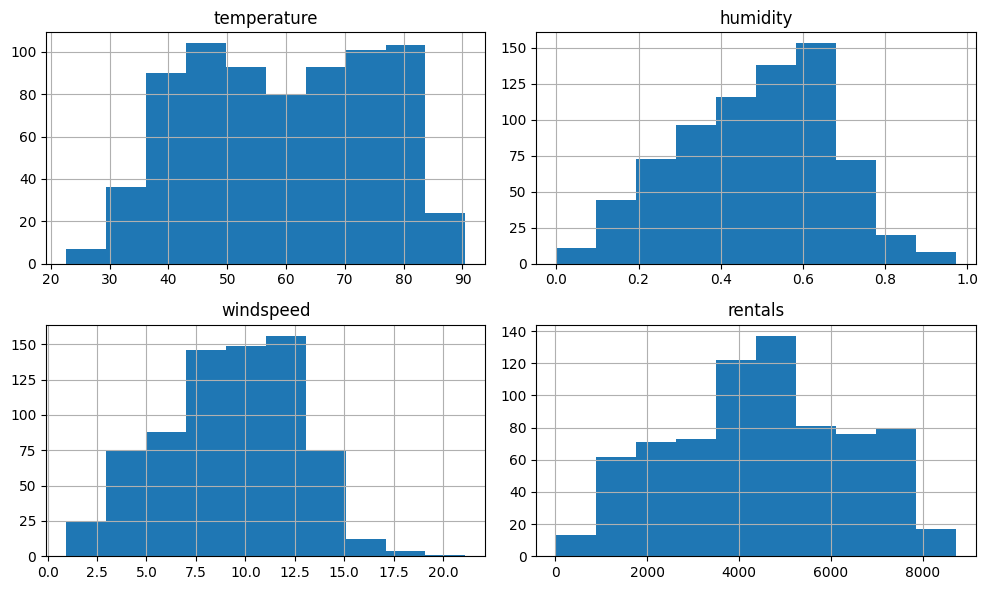

In [4]:
# Import the matplotlib library for data visualization
# 'plt' is the common alias used for convenience
import matplotlib.pyplot as plt

# This command ensures that plots appear directly inside the notebook
# rather than opening in a separate window (used only in Jupyter/Colab)
%matplotlib inline


# -------------------------------------------------------------
# SCATTER PLOTS: Relationship of features (X) vs target (Y)
# -------------------------------------------------------------

# We assume the dataset has a target column named 'rentals'
# We'll create scatter plots of each numeric feature vs. 'rentals'

# Check if 'rentals' exists in the dataset
if 'rentals' in bikes.columns:
    # If yes, build a list of all other columns except 'rentals' (these are predictors)
    features = [c for c in bikes.columns if c != 'rentals']
else:
    # If 'rentals' does not exist, use all columns as features (fallback option)
    features = list(bikes.columns)

# Print the selected feature names
print(features)  # Example: ['temperature', 'humidity', 'windspeed'] — Target column is "rentals"


# Loop through each feature to create a scatter plot
for col in features:
    try:
        # Create a new figure (each feature gets its own chart)
        # figsize=(6,3) means the figure will be 6 inches wide and 3 inches tall
        plt.figure(figsize=(6,3))

        # Create a scatter plot:
        # X-axis → feature column (e.g., temperature)
        # Y-axis → rentals (if it exists), otherwise plot the same feature (fallback)
        plt.scatter(
            bikes[col],
            bikes['rentals'] if 'rentals' in bikes.columns else bikes[col]
        )

        # Label the x-axis with the current feature name
        plt.xlabel(col)

        # Label the y-axis:
        # If 'rentals' column exists, use 'rentals' as Y label; else, reuse the same column name
        plt.ylabel('rentals' if 'rentals' in bikes.columns else col)

        # Add a dynamic plot title:
        # Example: "temperature vs rentals" or "Distribution of temperature"
        plt.title(
            f"{col} vs rentals" if 'rentals' in bikes.columns else f"Distribution of {col}"
        )

        # Adjust layout to ensure labels and titles don’t overlap or get cut off
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        # If a column can’t be plotted (e.g., non-numeric data), skip and print error message
        print(f"Skipping plot for {col}: {e}")


# -------------------------------------------------------------
# HISTOGRAMS: Distribution of numeric features
# -------------------------------------------------------------

# Print section title
print('\nFeature distributions:')

# Select only numeric columns from the dataset using pandas 'select_dtypes'
# and plot histograms for each to visualize their distributions
bikes.select_dtypes(include=['number']).hist(figsize=(10,6))

# Adjust layout so that multiple histograms fit neatly without overlap
plt.tight_layout()



## 3) Data Quality Checks
We'll look for missing values, duplicates, incorrect types, and outliers.


In [5]:
# Missing values per column
print('Missing values per column:')
display(bikes.isnull().sum())

# Percentage missing
print('\nPercentage missing per column:')
display((bikes.isnull().mean()*100).round(2))

# Duplicates
print('\nNumber of duplicate rows:', bikes.duplicated().sum())

# Data types
print('\nData types:')
display(bikes.dtypes)


Missing values per column:


,0
temperature,0
humidity,0
windspeed,0
rentals,0



Percentage missing per column:


,0
temperature,0.0
humidity,0.0
windspeed,0.0
rentals,0.0



Number of duplicate rows: 0

Data types:


,0
temperature,float64
humidity,float64
windspeed,float64
rentals,int64


## 4) Cleaning: Handling missing values, duplicates, and types
We provide safe, commented code for common cleaning operations. Choose options based on the dataset and the amount of missing data.


In [6]:
# Make a copy before cleaning (so original remains available for teaching/demonstration)
bikes_clean = bikes.copy()

# 1) Duplicates: drop exact duplicate rows
dupes = bikes_clean.duplicated().sum()
print(f'Duplicates found: {dupes}')
if dupes > 0:
    bikes_clean.drop_duplicates(inplace=True)
    print('Duplicates dropped.')

# 2) fixing wrong data types
# Convert numeric-like columns to numeric (coerce errors to NaN so we can handle them)
for col in bikes_clean.columns:
    if bikes_clean[col].dtype == object:
        # Try to convert object columns to numeric where appropriate
        bikes_clean[col] = pd.to_numeric(bikes_clean[col], errors='ignore')

# 3) Missing values: quick strategies
print('\nMissing values before filling:')
display(bikes_clean.isnull().sum())

# Example strategy: for numeric columns, fill with median; for categorical, fill with mode

#Numeric columns → fill missing values with the median
for col in bikes_clean.select_dtypes(include=['number']).columns:
    if bikes_clean[col].isnull().sum() > 0:
        median_val = bikes_clean[col].median()
        bikes_clean[col].fillna(median_val, inplace=True)
        print(f'Filled missing numeric values in {col} with median = {median_val}')

#Categorical columns → fill missing values with the mode (most frequent value)
for col in bikes_clean.select_dtypes(include=['object', 'category']).columns:
    if bikes_clean[col].isnull().sum() > 0:
        mode_vals = bikes_clean[col].mode()
        if not mode_vals.empty:
            bikes_clean[col].fillna(mode_vals[0], inplace=True)
            print(f'Filled missing categorical values in {col} with mode = {mode_vals[0]}')

print('\nMissing values after filling:')
display(bikes_clean.isnull().sum())


Duplicates found: 0

Missing values before filling:


,0
temperature,0
humidity,0
windspeed,0
rentals,0



Missing values after filling:


,0
temperature,0
humidity,0
windspeed,0
rentals,0


## 5) Outlier Detection and Handling
We will use IQR to detect potential outliers and optionally remove them. For teaching, we show both approaches and explain trade-offs.


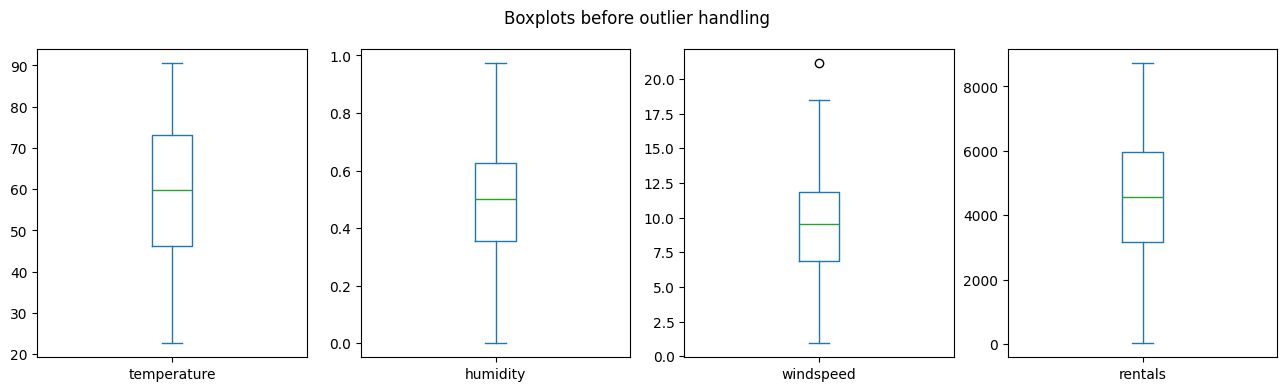

Removed 0 rows based on IQR for temperature
Removed 0 rows based on IQR for humidity
Removed 1 rows based on IQR for windspeed
Removed 0 rows based on IQR for rentals


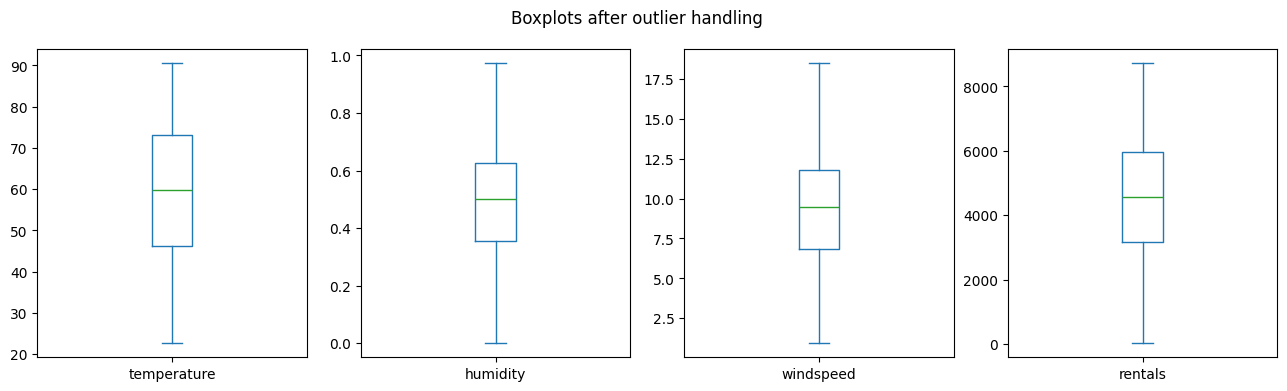


Shape before outlier removal: (731, 4)
Shape after outlier removal: (730, 4)


In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Show boxplots before removal
num_cols = bikes_clean.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    bikes_clean[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(4*len(num_cols),4))
    plt.suptitle('Boxplots before outlier handling')
    plt.show()

# Optionally remove outliers for each numeric column
bikes_no_outliers = bikes_clean.copy()
for col in num_cols:
    before = bikes_no_outliers.shape[0]
    bikes_no_outliers = remove_outliers_iqr(bikes_no_outliers, col)
    after = bikes_no_outliers.shape[0]
    print(f'Removed {before-after} rows based on IQR for {col}')

# Show boxplots after removal
if num_cols:
    bikes_no_outliers[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(4*len(num_cols),4))
    plt.suptitle('Boxplots after outlier handling')
    plt.show()

print('\nShape before outlier removal:', bikes_clean.shape)
print('Shape after outlier removal:', bikes_no_outliers.shape)


## 6) Modeling: Linear Regression
We will use cleaned data to train a linear regression model. We show coefficients and basic evaluation metrics.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Choose target column
TARGET = 'rentals' if 'rentals' in bikes_no_outliers.columns else bikes_no_outliers.columns[-1]
print('Using target column:', TARGET)

# Prepare X and y
X = bikes_no_outliers.drop(columns=[TARGET])
y = bikes_no_outliers[[TARGET]]

# For safety, keep only numeric predictors (scikit-learn requires numeric input)
X = X.select_dtypes(include=['number'])

print('Predictor columns used:')
print(X.columns.tolist())

# Train/test split - (random_state=42) random seed number that ensures your data split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nShapes:')
print('X_train', X_train.shape, 'X_test', X_test.shape, 'y_train', y_train.shape, 'y_test', y_test.shape)


# When you train a Linear Regression model, it tries to find the best straight line that fits your data.
# The prediction line is represented as:
#     y = m*x + c
# or, for multiple features:
#     y = b0 + b1*x1 + b2*x2 + ... + bn*xn

# Where:
#   Term       Meaning
#   -----------------------------------------------
#   y           Predicted value (target, e.g., marks)
#   x           Input feature (e.g., study hours, attendance)
#   m or b1..bn Slope / Coefficients (how strongly each feature affects the outcome)
#   c or b0     Intercept (value of y when all x = 0)


# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# In scikit-learn, after training your Linear Regression model using:
#     model.fit(X, y)
# two important attributes are created:

# 1️⃣ model.intercept_
#     - This is the intercept (c or b0) of the line.
#     - It represents the predicted value of y when all input features (x) are 0.
#     - Example: If model.intercept_ = 20, it means when x = 0, predicted y = 20.

# 2️⃣ model.coef_
#     - These are the coefficients (m or b1, b2, ...).
#     - Each coefficient shows how much y changes when that particular x increases by 1 unit.
#     - Example: If model.coef_ = [10], it means for every 1-hour increase in study time, marks increase by 10.

# Example:
# Intercept: 20.0
# Coefficient: [10.0]
# So, the regression equation is:
#     y = 10*x + 20
#
# Meaning:
# - When study_hours = 0 → marks = 20
# - For every additional hour → marks increase by 10



print('\nModel trained.')
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Using target column: rentals
Predictor columns used:
['temperature', 'humidity', 'windspeed']

Shapes:
X_train (584, 3) X_test (146, 3) y_train (584, 1) y_test (146, 1)

Model trained.
Intercept: [3789.1810442]
Coefficients: [[   80.74673212 -4740.00677203  -192.75504846]]


## 7) Evaluation
We evaluate with MAE, RMSE, and R². We also plot Actual vs Predicted and residuals for interpretation.

MAE: 193.139
RMSE: 240.912
R2 Score: 0.984


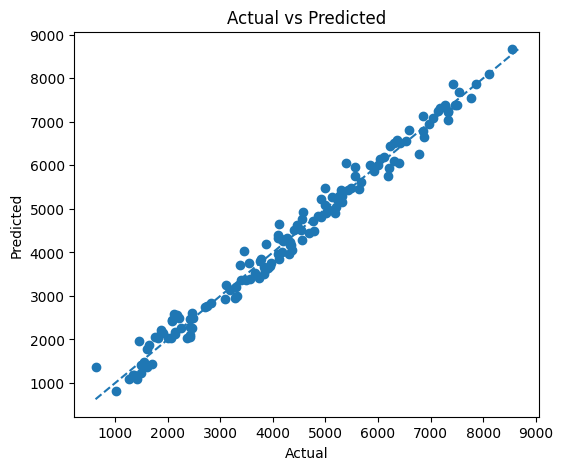

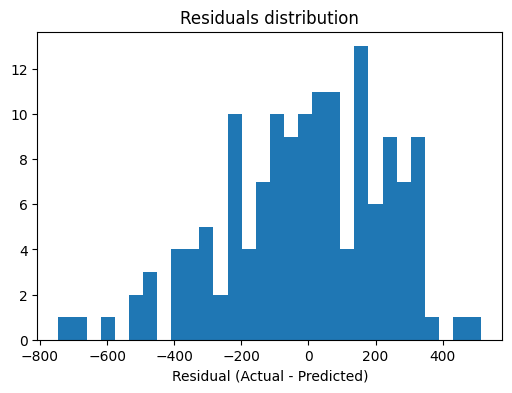

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')

# Plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
# Plot 45-degree line for reference
lims = [min(y_test.min().values[0], y_pred.min()), max(y_test.max().values[0], y_pred.max())]
plt.plot(lims, lims, '--')
plt.show()

# Residuals
residuals = (y_test.values.flatten() - y_pred.flatten())
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title('Residuals distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()


Compare Training vs Testing Performance

In [ ]:
# --------------------------------------------
# 🔍 Compare Training vs Testing Performance
# --------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ------------------------
# Training Performance
# ------------------------
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# ------------------------
# Testing Performance
# ------------------------
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# ------------------------
# Print results side-by-side
# ------------------------
print("\n📊 Model Performance Comparison\n")
print(f"{'Metric':<15}{'Train':<15}{'Test':<15}")
print("-" * 45)
print(f"{'MAE':<15}{train_mae:<15.3f}{test_mae:<15.3f}")
print(f"{'RMSE':<15}{train_rmse:<15.3f}{test_rmse:<15.3f}")
print(f"{'R2 Score':<15}{train_r2:<15.3f}{test_r2:<15.3f}")

# --------------------------------------------
# 🧠 Interpretation Guide:
# --------------------------------------------
# - If Train and Test scores are close → ✅ Good generalization
# - If Train R2 ≫ Test R2 → ⚠️ Overfitting (model memorized data)
# - If both R2 are low → 🚫 Underfitting (model too simple)
# --------------------------------------------



📊 Model Performance Comparison

Metric         Train          Test           
---------------------------------------------
MAE            202.941        193.139        
RMSE           252.796        240.912        
R2 Score       0.983          0.984          


## 8) Closing notes, interpretations & extensions
- Interpret coefficients: `model.coef_` tells you the influence of each predictor on the target (when other features are held constant).
- Try improvements: feature engineering (day of week, holidays), regularization (Ridge/Lasso), polynomial features, or tree-based models.

### Homework / Exercises
1. Add a 'weekday' or 'is_holiday' feature and retrain the model.
2. Try Ridge regression and compare RMSE.
3. Use cross-validation to get more robust metric estimates.

---

If you'd like, I can now run this notebook here and show its outputs (requires executing the cells). Or I can save the notebook file for you to download — what would you prefer?

Saving bikes.csv to bikes.csv
First 5 rows of the dataset:


,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB

Descriptive statistics:


,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


['temperature', 'humidity', 'windspeed']


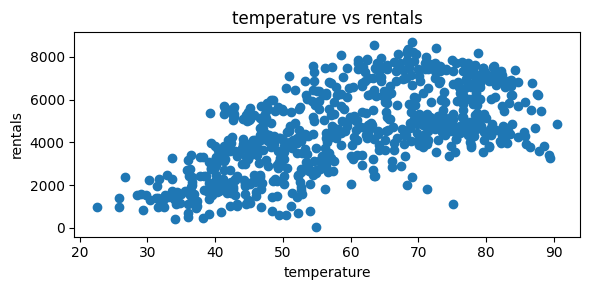

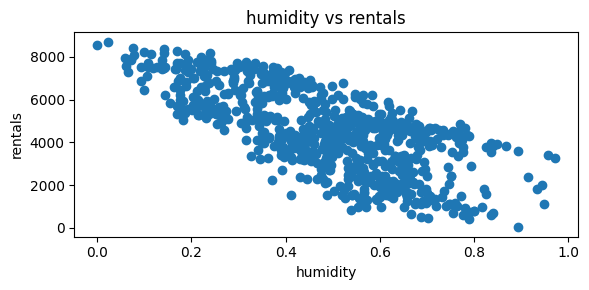

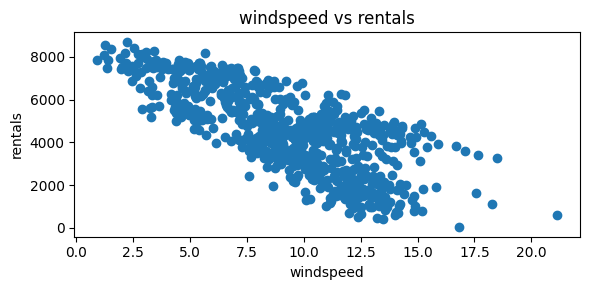


Feature distributions:
Missing values per column:


,0
temperature,0
humidity,0
windspeed,0
rentals,0



Percentage missing per column:


,0
temperature,0.0
humidity,0.0
windspeed,0.0
rentals,0.0



Number of duplicate rows: 0

Data types:


,0
temperature,float64
humidity,float64
windspeed,float64
rentals,int64


Duplicates found: 0

Missing values before filling:


,0
temperature,0
humidity,0
windspeed,0
rentals,0



Missing values after filling:


,0
temperature,0
humidity,0
windspeed,0
rentals,0


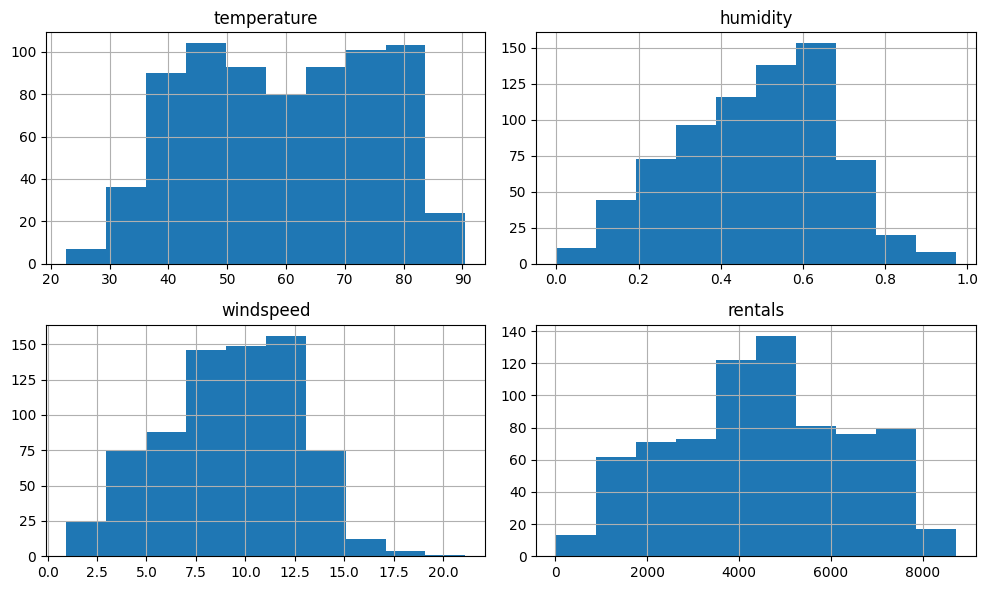

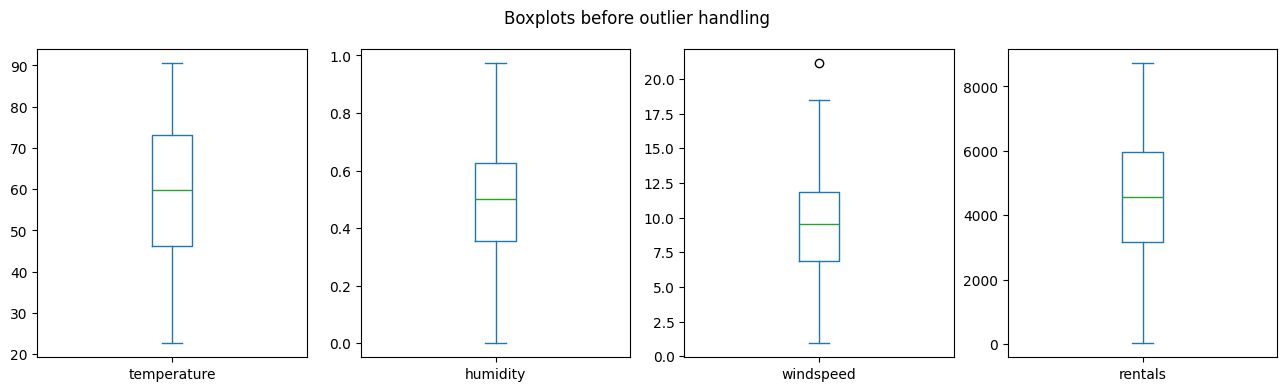

Removed 0 rows based on IQR for temperature
Removed 0 rows based on IQR for humidity
Removed 1 rows based on IQR for windspeed
Removed 0 rows based on IQR for rentals


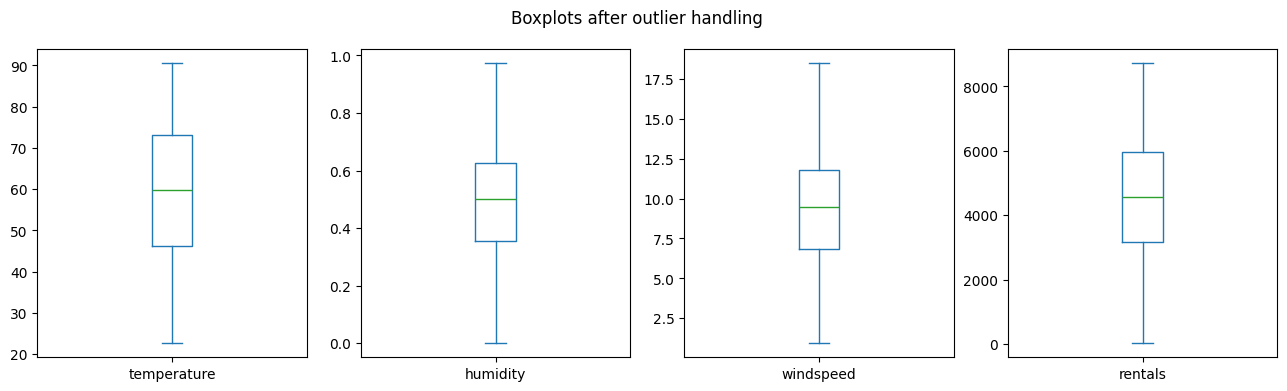


Shape before outlier removal: (731, 4)
Shape after outlier removal: (730, 4)
Using target column: rentals
Predictor columns used:
['temperature', 'humidity', 'windspeed']

Shapes:
X_train (584, 3) X_test (146, 3) y_train (584, 1) y_test (146, 1)

Model trained.
Intercept: [3789.1810442]
Coefficients: [[   80.74673212 -4740.00677203  -192.75504846]]
MAE: 193.139
RMSE: 240.912
R2 Score: 0.984


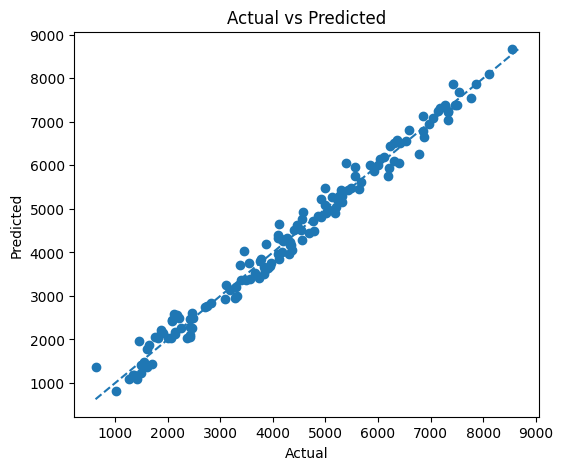

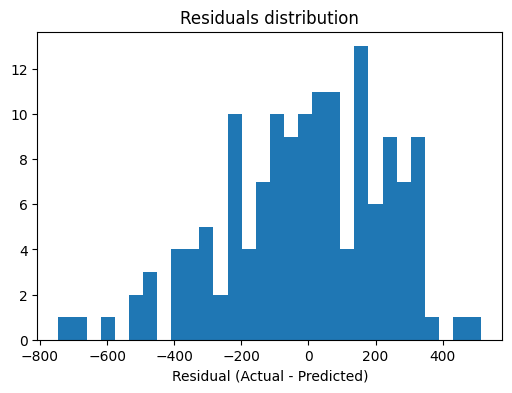


📊 Model Performance Comparison

Metric         Train          Test           
---------------------------------------------
MAE            202.941        193.139        
RMSE           252.796        240.912        
R2 Score       0.983          0.984          


In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Upload and load dataset
uploaded = files.upload()
bikes = pd.read_csv('bikes.csv')

print("First 5 rows of the dataset:")
display(bikes.head())
print('\nDataFrame info:')
bikes.info()
print('\nDescriptive statistics:')
display(bikes.describe(include='all'))

%matplotlib inline

# Scatter plots
if 'rentals' in bikes.columns:
    features = [c for c in bikes.columns if c != 'rentals']
else:
    features = list(bikes.columns)
print(features)

for col in features:
    try:
        plt.figure(figsize=(6,3))
        plt.scatter(bikes[col], bikes['rentals'] if 'rentals' in bikes.columns else bikes[col])
        plt.xlabel(col)
        plt.ylabel('rentals' if 'rentals' in bikes.columns else col)
        plt.title(f"{col} vs rentals" if 'rentals' in bikes.columns else f"Distribution of {col}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Skipping plot for {col}: {e}")

# Histograms
print('\nFeature distributions:')
bikes.select_dtypes(include=['number']).hist(figsize=(10,6))
plt.tight_layout()

# Data Quality Checks
print('Missing values per column:')
display(bikes.isnull().sum())
print('\nPercentage missing per column:')
display((bikes.isnull().mean()*100).round(2))
print('\nNumber of duplicate rows:', bikes.duplicated().sum())
print('\nData types:')
display(bikes.dtypes)

# Cleaning
bikes_clean = bikes.copy()
dupes = bikes_clean.duplicated().sum()
print(f'Duplicates found: {dupes}')
if dupes > 0:
    bikes_clean.drop_duplicates(inplace=True)
    print('Duplicates dropped.')

for col in bikes_clean.columns:
    if bikes_clean[col].dtype == object:
        bikes_clean[col] = pd.to_numeric(bikes_clean[col], errors='ignore')

print('\nMissing values before filling:')
display(bikes_clean.isnull().sum())

for col in bikes_clean.select_dtypes(include=['number']).columns:
    if bikes_clean[col].isnull().sum() > 0:
        median_val = bikes_clean[col].median()
        bikes_clean[col].fillna(median_val, inplace=True)
        print(f'Filled missing numeric values in {col} with median = {median_val}')

for col in bikes_clean.select_dtypes(include=['object', 'category']).columns:
    if bikes_clean[col].isnull().sum() > 0:
        mode_vals = bikes_clean[col].mode()
        if not mode_vals.empty:
            bikes_clean[col].fillna(mode_vals[0], inplace=True)
            print(f'Filled missing categorical values in {col} with mode = {mode_vals[0]}')

print('\nMissing values after filling:')
display(bikes_clean.isnull().sum())

# Outlier handling
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

num_cols = bikes_clean.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    bikes_clean[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(4*len(num_cols),4))
    plt.suptitle('Boxplots before outlier handling')
    plt.show()

bikes_no_outliers = bikes_clean.copy()
for col in num_cols:
    before = bikes_no_outliers.shape[0]
    bikes_no_outliers = remove_outliers_iqr(bikes_no_outliers, col)
    after = bikes_no_outliers.shape[0]
    print(f'Removed {before-after} rows based on IQR for {col}')

if num_cols:
    bikes_no_outliers[num_cols].plot(kind='box', subplots=True, layout=(1,len(num_cols)), figsize=(4*len(num_cols),4))
    plt.suptitle('Boxplots after outlier handling')
    plt.show()

print('\nShape before outlier removal:', bikes_clean.shape)
print('Shape after outlier removal:', bikes_no_outliers.shape)

# Linear Regression
TARGET = 'rentals' if 'rentals' in bikes_no_outliers.columns else bikes_no_outliers.columns[-1]
print('Using target column:', TARGET)
X = bikes_no_outliers.drop(columns=[TARGET])
y = bikes_no_outliers[[TARGET]]
X = X.select_dtypes(include=['number'])

print('Predictor columns used:')
print(X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nShapes:')
print('X_train', X_train.shape, 'X_test', X_test.shape, 'y_train', y_train.shape, 'y_test', y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)
print('\nModel trained.')
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
lims = [min(y_test.min().values[0], y_pred.min()), max(y_test.max().values[0], y_pred.max())]
plt.plot(lims, lims, '--')
plt.show()

residuals = (y_test.values.flatten() - y_pred.flatten())
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title('Residuals distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

# Compare Training vs Testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 Model Performance Comparison\n")
print(f"{'Metric':<15}{'Train':<15}{'Test':<15}")
print("-" * 45)
print(f"{'MAE':<15}{train_mae:<15.3f}{test_mae:<15.3f}")
print(f"{'RMSE':<15}{train_rmse:<15.3f}{test_rmse:<15.3f}")
print(f"{'R2 Score':<15}{train_r2:<15.3f}{test_r2:<15.3f}")
